In [2]:
import pandas as pd
import math
import numpy as np
import pylab
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import scipy


In [3]:
from matplotlib import pyplot as plt

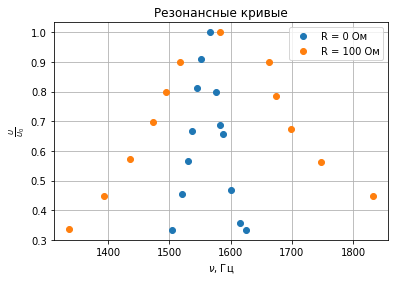

<Figure size 432x288 with 0 Axes>

In [4]:
x = np.array([1504, 1521, 1530, 1537, 1545, 1551, 1566, 1577, 1583, 1588, 1601, 1615, 1625], dtype=np.float64)
y = np.array([3.0, 4.1, 5.1, 6.0, 7.3, 8.2, 9.0, 7.2, 6.2, 5.9, 4.2, 3.2, 3.0],dtype=np.float64)
for i in range(len(y)):
    y[i] /= 9
plt.plot(x, y, 'o', label='R = 0 Ом')
plt.title('Резонансные кривые')
plt.xlabel(r'$\nu$' + ', Гц')
plt.ylabel(r'$\frac{U}{U_0}$')

x1 = np.array([1336, 1393, 1436, 1474, 1495, 1517, 1583, 1662, 1675, 1698, 1748, 1833], dtype=np.float64) #1675
y1 = np.array([3, 4, 5.1, 6.2, 7.1, 8.0, 8.9, 8, 7, 6, 5, 4],dtype=np.float64)
for i in range(len(y1)):
    y1[i] /= 8.9
plt.plot(x1, y1, 'o', label='R = 100 Ом')
plt.legend()

plt.grid()
plt.savefig('plot.png', dpi=300) #Сохраняем график в файл
plt.show()
plt.draw()

Optimal = [65997.41504568 -1724.67771474]


dispersion = 0.014923412081311095
Power_divergenceResult(statistic=0.005591407372087449, pvalue=1.0)
[1540, 1583]
delta Omega = 1545
Optimal = [66017.79204154 -1714.62469281]


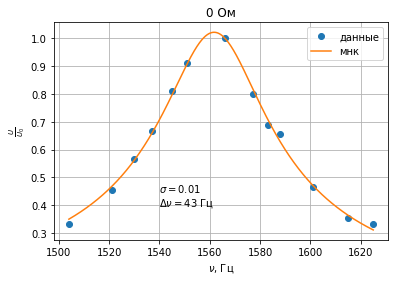

In [26]:
def func(arr, A, C):
    return A / np.sqrt((1562**2 - arr**2)**2 + np.absolute(C) * arr**2)


popt, pcov = curve_fit(func, x, y) 

dispersion = 0

for i in range(len(y)):
    dispersion += (func(x[i], *popt) - y[i]) ** 2
dispersion /= len(y)
dispersion = np.sqrt(dispersion)
print('dispersion = ' + str(dispersion))

plt.plot(x, y, 'o', label='данные')
x_ = np.linspace(x[0], x[len(x) - 1], 10000)
plt.plot(x_, func(x_, *popt), label='мнк') #из МНК
plt.title('0 Ом')
plt.xlabel(r'$\nu$' + ', Гц')
plt.ylabel(r'$\frac{U}{U_0}$')
plt.legend()
plt.grid()
plt.text(1540, 0.4, r'$\sigma = $' + str(int(dispersion * 100)/100) + '\n' + r'$\Delta \nu = $' + str(1581-1538) + ' Гц' )

plt.savefig('plot_0Ohm.png', dpi=300) #Сохраняем график в файл

plt.draw()


obs_vals = scipy.array(y)
exp_vals = scipy.array(func(x, *popt))
print(chisquare(obs_vals, f_exp=exp_vals))


width = []

for i in range(1500, 1600):
    if func(i, *popt) <= 1/math.sqrt(2)+0.01 and func(i, *popt) >= 1/math.sqrt(2)-0.01:
        width.append(i)
print(width)

for i in range(1544, 1560):
    if func(i, *popt) > func(1544, *popt) + dispersion:
        print('delta Omega = ' + str(i))
        break
        
print('Optimal = '+str(popt))

dispersion = 0.049035213040919796
Power_divergenceResult(statistic=0.05647082396080175, pvalue=0.9999999999897724)
[1472, 1691]
Opt[329994.99480292  38866.87906237]


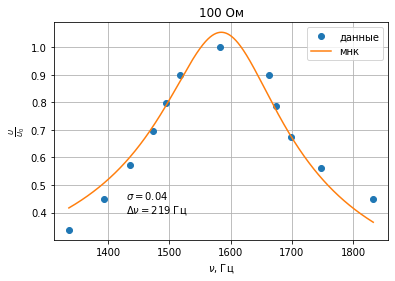

In [29]:
def func(arr, A, C):
    return A / np.sqrt((1591**2 - arr**2)**2 + np.absolute(C) * arr**2)


popt, pcov = curve_fit(func, x1, y1) 

dispersion = 0

for i in range(len(y1)):
    dispersion += (func(x1[i], *popt) - y1[i]) ** 2
dispersion /= len(y1)
dispersion = np.sqrt(dispersion)
print('dispersion = ' + str(dispersion))

plt.plot(x1, y1, 'o', label='данные')
x_ = np.linspace(x1[0], x1[len(x1) - 1], 10000)
plt.plot(x_, func(x_, *popt), label='мнк')
plt.title('100 Ом')
plt.legend()
plt.grid()
plt.xlabel(r'$\nu$' + ', Гц')
plt.ylabel(r'$\frac{U}{U_0}$')
plt.text(1430, 0.4, r'$\sigma = $' + str(int(dispersion * 100)/100) + '\n' + r'$\Delta \nu = $' + str(1691-1472) + ' Гц' )

plt.savefig('plot_100Ohm.png', dpi=300) #Сохраняем график в файл

plt.draw()

obs_vals = scipy.array(y1)
exp_vals = scipy.array(func(x1, *popt))
print(chisquare(obs_vals, f_exp=exp_vals))

width = []

for i in range(1400, 1800):
    if func(i, *popt) <= 1/math.sqrt(2)+0.002 and func(i, *popt) >= 1/math.sqrt(2)-0.002:
        width.append(i)
print(width)

print('Opt' + str(popt))